## T-SNE Amazon Food Review TFIDF Weighted W2V

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

* All data in one sqlite database. 568,454 food reviews Amazon users left up to October 2012
* Total Columns:10
* Columns List:Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenomenator,Score or Rating,Time,Summary,Text.
* We are Droping Id column and changing our Score variable to Response

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Read Data from creditcard.csv file and store it in credit data frame.
data = pd.read_csv("amazon_tfidfw2v_vect.csv")
print(data.columns)
data.head(5)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'Class'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Class
0,-0.100898,-0.207214,-0.424923,0.114192,-0.357555,0.770309,-0.500420,0.206777,0.133103,-0.260041,...,0.337105,-0.349778,0.511841,-0.046044,-0.054374,-0.185968,0.203339,0.229548,-0.168397,negative
1,0.067781,-0.077964,-0.402232,0.389273,-0.856220,0.777655,-0.533367,0.315549,0.394528,-0.582911,...,0.398808,-0.618997,0.419316,0.239279,0.077313,-0.390451,0.568315,0.425455,-0.081276,positive
2,-0.159021,-0.033007,-0.226351,0.122637,-0.615943,0.933311,-0.509815,0.488212,0.189742,-0.213457,...,0.431852,-0.304856,0.577578,-0.002143,-0.306752,0.203707,0.374281,0.286484,-0.359113,negative
3,-0.177032,-0.341415,-0.210877,-0.067660,-0.831852,1.014871,-0.517068,0.304524,0.161110,-0.216540,...,0.284507,-0.724447,0.374440,0.199015,-0.064901,-0.245667,0.415411,0.183267,-0.273365,negative
4,-0.150880,-0.328746,-0.212175,0.120813,-0.440906,0.812495,-0.525375,0.603962,-0.124447,-0.414795,...,0.329055,-0.397313,0.537189,-0.102160,-0.072738,-0.199337,0.570543,0.252189,-0.200916,positive


In [2]:
# Seperating Data frame into Class vs Non Class columns and Storing them in X and Y.
X = np.array(data.loc[:, data.columns != 'Class'])
Y = np.array(data.loc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(Y.shape))

Shape of X: (5000, 50)
Shape of y: (5000, 1)


**Why Standardization?**
* TSNE basically preserves the distances of Neighbourhood points if perplexity is 10 then it need to take 10 neighbourhood points based upon the distance. If the scale is different for each feature then eucliedian distance will be impacted by scale where we need standardization.

In [3]:
# Data Preprocessing: Standardizing the Data.
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
standardized_data.shape

(5000, 50)

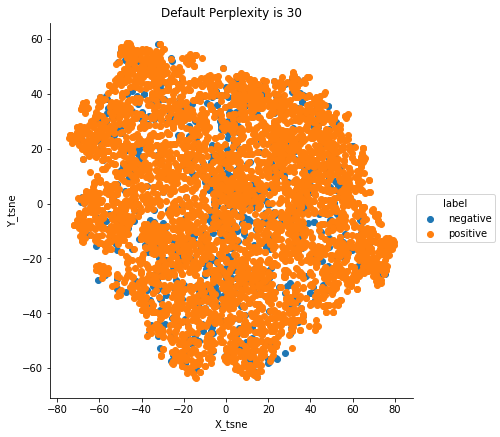

In [5]:
# T-SNE with Default perplexity and default iterations.
from sklearn.manifold import TSNE
model = TSNE(n_components=2,random_state=0)
# No of components is 2 which means two dimentional visualization.
# Default perplexity = 30
# default learning rate = 200
# Default n_iter=1000.
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Default Perplexity is 30')
plt.show() 

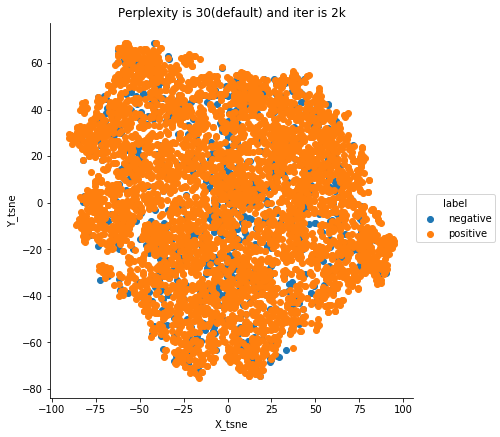

In [6]:
# Now Perplexity is 30 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,n_iter=2000) #Default perplexity=30
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 30(default) and iter is 2k')
plt.show()

**Observation:**
* Even though my points are stabilizing at n_iter=1000, I am taking relatively high value i.e n_iter=2k

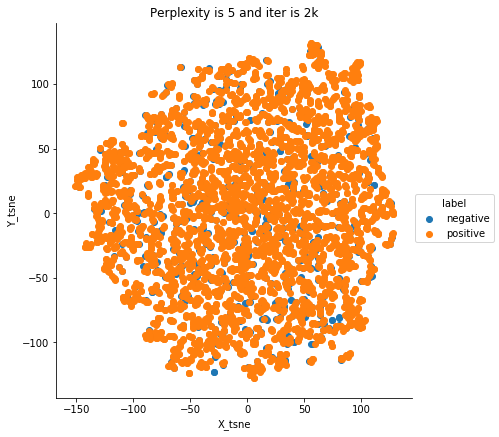

In [9]:
# Now Perplexity is 5 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=5,n_iter=2000) # Default perplexity.
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 5 and iter is 2k')
plt.show()

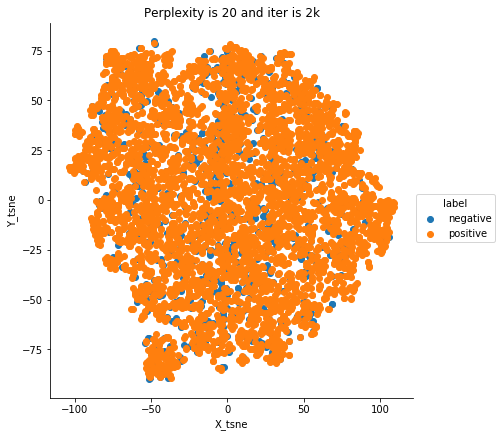

In [8]:
# Now Perplexity is 20 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=20,n_iter=2000) # Default perplexity.
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 20 and iter is 2k')
plt.show()

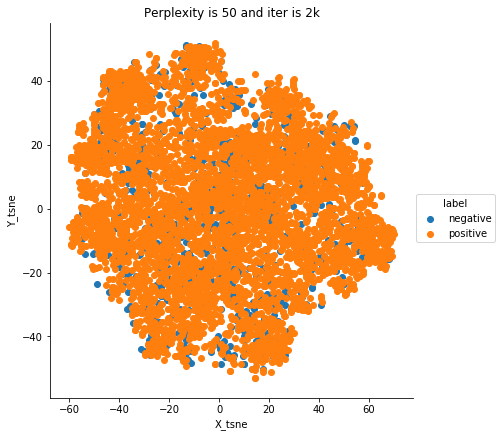

In [10]:
# Now Perplexity is 50 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 50 and iter is 2k')
plt.show()

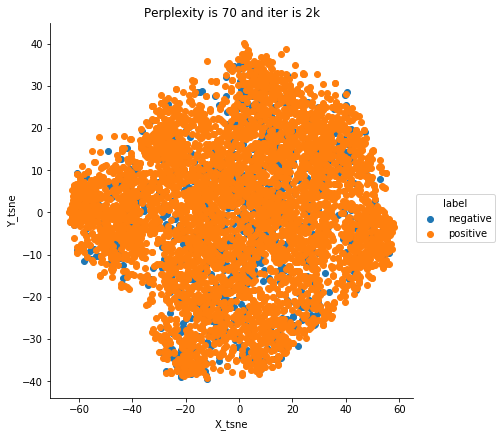

In [11]:
# Now Perplexity is 70 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=70,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 70 and iter is 2k')
plt.show()

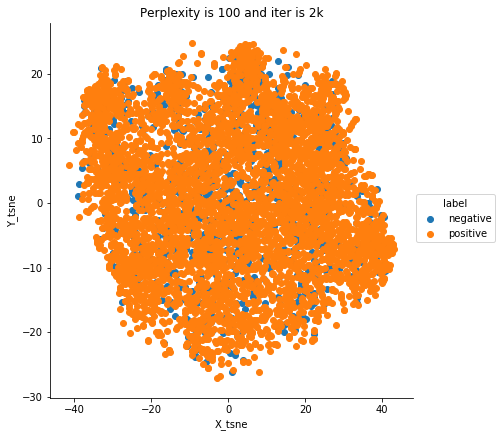

In [12]:
# Now Perplexity is 100 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=100,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 100 and iter is 2k')
plt.show()

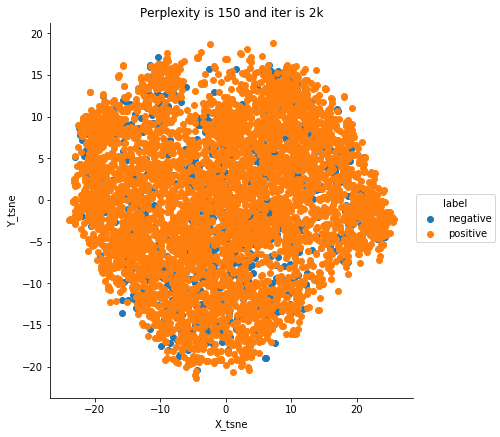

In [13]:
# Now Perplexity is 150 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=150,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 150 and iter is 2k')
plt.show()

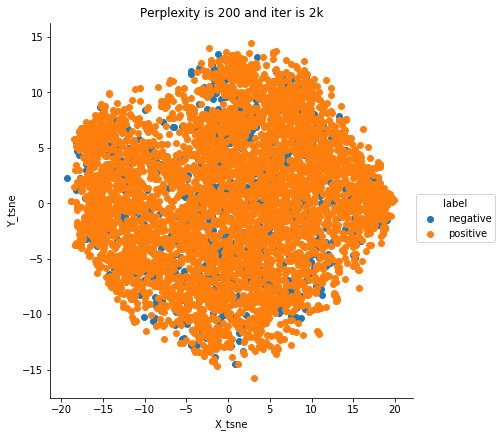

In [14]:
# Now Perplexity is 200 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=200,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 200 and iter is 2k')
plt.show()

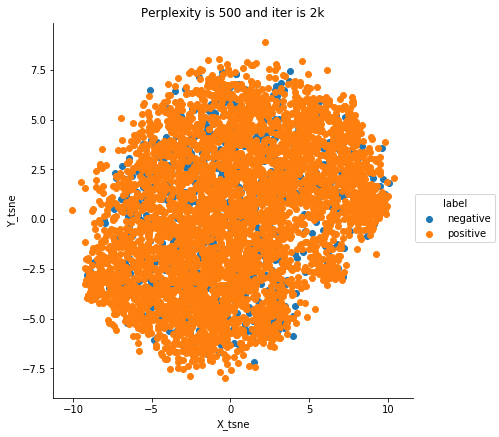

In [15]:
# Now Perplexity is 500 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=500,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 500 and iter is 2k')
plt.show()

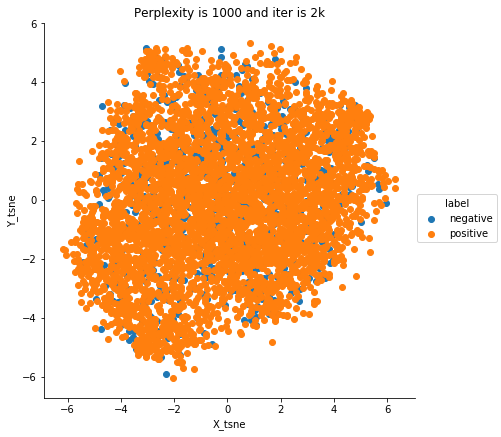

In [16]:
# Now Perplexity is 1000 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=1000,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 1000 and iter is 2k')
plt.show()

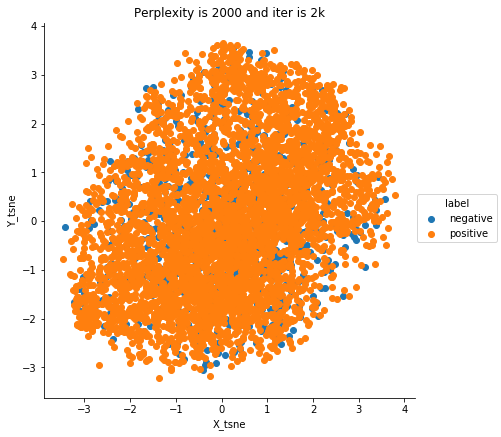

In [17]:
# Now Perplexity is 2000 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=2000,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 2000 and iter is 2k')
plt.show()

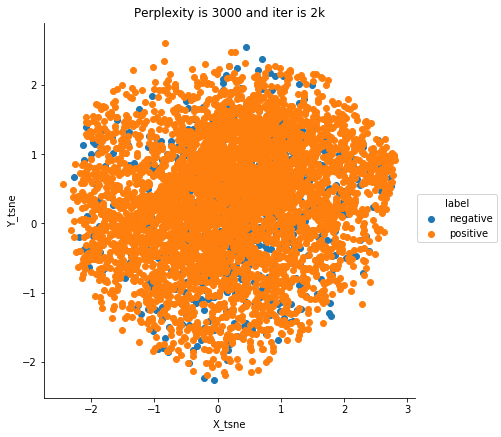

In [6]:
# Now Perplexity is 3000 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=3000,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 3000 and iter is 2k')
plt.show()

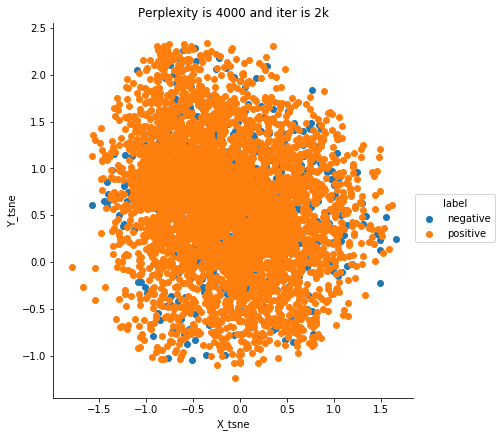

In [7]:
# Now Perplexity is 4000 and No of iterations is 2k
model = TSNE(n_components=2,random_state=0,perplexity=4000,n_iter=2000) 
tsne_data = model.fit_transform(standardized_data)
# Creating new data frame which helps us plotting.
tsne_data = np.concatenate([tsne_data,Y], axis=1)
tsne_df = pd.DataFrame(data=tsne_data,columns=("X_tsne","Y_tsne","label"))
# Plotting the results of tsne
sns.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,'X_tsne','Y_tsne').add_legend()
plt.title('Perplexity is 4000 and iter is 2k')
plt.show()

**Observation:**
* If we look at the different perplexity values from 5 to 4k, if perplexity increases size of the cluster formation will also increases.
* In each of the cases points are not seperated.